# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2026-1
## ARBOLES DE DECISIÓN
## LABORATORIO 1/4

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando árboles de decisión
2. Implementar árboles de decisión
3. Apropiar un framework para árboles de decisión (*scikit-learn*)
4. Conocer una librería para procesamiento de datos simbólicos (*python pandas DataFrame*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Este laboratorio se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “DT-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# **PARTE I. IMPLEMENTACIÓN DE ÁRBOLES DE DECISIÓN**
Para este apartado se van a implementar un árbol de decisión, en este caso usando como medida la entropia.

*La idea de los árboles de decisión fue desarrollada paulatinamiente. El pionero más reconocido es Ross Quinlan, quien propuso en 1986 el algoritmo ID3 (Iterative Dichotomiser 3) en el artículo [Induction of decision trees](https://link.springer.com/article/10.1007/BF00116251). Este algoritmo marcó un hito en la construcción automática de árboles de decisión a partir de datos.*

## I.A. IMPLEMENTACIÓN DE UN ÁRBOL DE DECISIÓN

Implementar un árbol de decisión; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades:**

*   Tarea: **Clasificación binaria**
*   Características: **Categóricas**
*   Criterio de selección: **Ganancia de información**
*   Métrica para evaluación : **F1 SCORE**

<div>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Precision-vs-Recall-in-Machine-Learning.webp" width="350"/>
</div>

> **Formulas**

*   Impureza : **Entropía: H**

*   Ganancia de información: **IG(D,A)**

*   Impureza de Arbol: **Impurity(V\*)**







## Paso 1. Criterios de selección de atributos
Las impurezas en árboles de decision miden cuán homogéneas o heterogéneas son las clases dentro de un conjunto de datos ***en un nodo del árbol***. La métrica de impureza determina cómo dividir los datos en cada nodo.
Los principales métodos de evaluación de impureza son: **entropía** e **indice gini**.

*Incluyan las formulas de los dos criterios de selección y comparelos considerando criterios como sensibilidad al desbalance de clases y eficiencia computacional*

---
**Entropia:**
$$
H(X) = - \sum_{i=1}^{n} P(x_i) \log_b P(x_i)
$$
---
**Gini**

$$
\text{Gini Index} = 1 - \sum_{i=1}^{n} p_i^2
$$
---
**Comparación**
| Aspecto | Entropía | Índice de Gini |
|----------|-----------|----------------|
| Qué mide | Incertidumbre o cantidad de información | Impureza del nodo |
| Interpretación intuitiva | Qué tan "mezcladas" están las clases en términos de información | Qué tan probable es equivocarse al clasificar al azar |
| Rango (clasificación binaria) | 0 a 1 | 0 a 0.5 |
| Valor mínimo | 0 (nodo puro) | 0 (nodo puro) |
| Valor máximo | 1 (50%-50%) | 0.5 (50%-50%) |
| Sensibilidad | Más sensible a cambios en probabilidades pequeñas | Menos sensible a probabilidades pequeñas |
| Costo computacional | Ligeramente mayor (usa logaritmos) | Más simple y más rápido de calcular |


## Paso 2. Ganancia de una característica e impureza del árbol
Los otros dos conceptos de fundamentan los árboles de decisión son la **ganancia de información** y la **impureza *de un arbol***.

*Expliquen su proposito y la fórmula correspondiente, detallandola.*

---
**Ganancia:**
La ganancia mide cuánto reduce la impureza una división del nodo.  
Es el criterio que el árbol usa para decidir cuál atributo elegir en cada paso.

La idea es simple:
*Impureza antes de dividir* − *Impureza después de dividir.*


---
**Impureza**
La impureza mide qué tan mezcladas están las clases dentro de un nodo del árbol.  
Un nodo es puro si todos los ejemplos pertenecen a la misma clase.  
Es impuro si contiene varias clases mezcladas.

En un árbol de decisión, buscamos divisiones que reduzcan la impureza.



## Paso 3. Implementación del código base para un árbol de decisión

### Librería necesaria

In [1]:
import pandas as pd
from abc import ABC, abstractmethod

### Funciones base: métrica y criterio

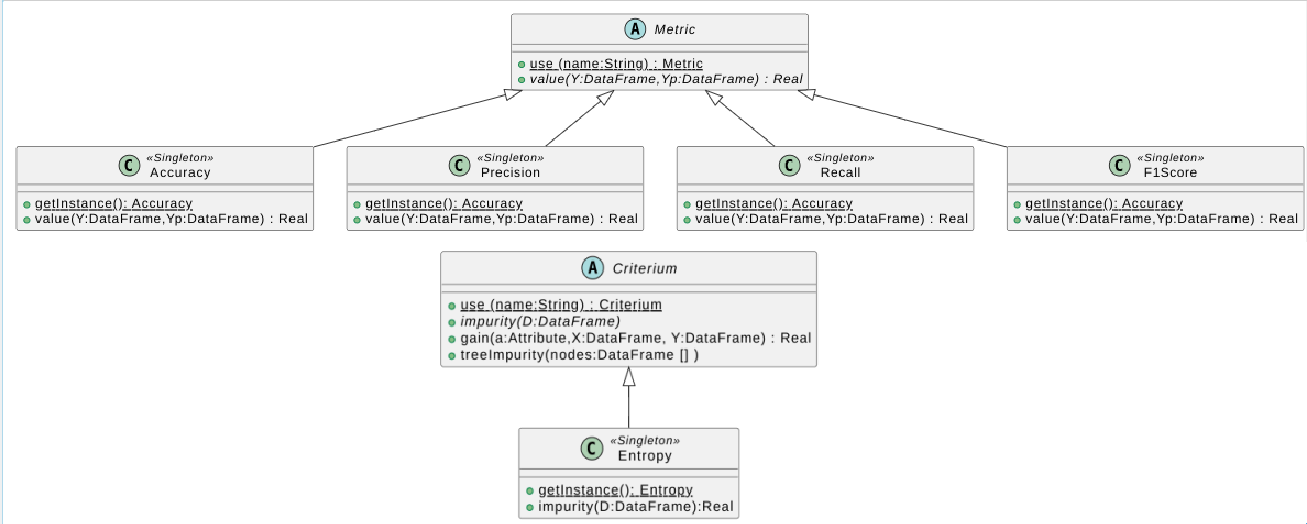

###Métrica

In [ ]:
class Metric(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
  Representa una metrica de desempeño P para evaluar una tarea T
  """

  @classmethod
  def use(cls, name: str):
    """ obtiene metrica (OBJ) a partir del nombre
    Args:
      name  : nombre esperado de la metrica
    Returns:
       objeto metrica
    """
    if name is None:
      raise ValueError("name no puede ser None")

    key = str(name).strip().lower().replace(" ", "").replace("_", "")

    if key in ["precision", "prec"]:
      return Precision()
    if key in ["recall", "exhaustividad", "rec", "sensibilidad"]:
      return Recall()
    if key in ["f1", "f1score", "fscore"]:
      return F1Score()

    raise ValueError(f"Métrica no soportada: {name}. Use: precision | recall | f1")

  @abstractmethod
  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ computa el desempeño P
    Args:
      Y   : salidas esperadas (etiquetadas)
      Yp  : salidas obtenidas
    Return:
      valor del desempeño
    """
    raise NotImplementedError

In [ ]:
# Documentar los métodos implementados
class Accuracy(Metric):
  """ Metrica de exactitud (acertados / totales). Implementa Metric
  """
  def __new__(cls):
    pass

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    pass

In [ ]:
class Precision(Metric):
  """ Metrica de precision). Implementa Metric
  """
  _instance = None

  def __new__(cls):
    """ Implementa patrón Singleton asegurando una única instancia """
    if cls._instance is None:
      cls._instance = super().__new__(cls)
    return cls._instance

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ Calcula la precisión como TP / (TP + FP)
    Args:
      Y   : etiquetas reales
      Yp  : predicciones del modelo
    Returns:
      valor de precisión
    """
    y = pd.Series(Y.squeeze()).astype(int)
    yp = pd.Series(Yp.squeeze()).astype(int)

    tp = int(((y == 1) & (yp == 1)).sum())
    fp = int(((y == 0) & (yp == 1)).sum())

    denom = tp + fp
    return 0.0 if denom == 0 else tp / denom

In [ ]:
class Recall(Metric):
  """ Metrica de exhaustividad. Implementa Metric
  """
  _instance = None

  def __new__(cls):
    """ Implementa patrón Singleton asegurando una única instancia """
    if cls._instance is None:
      cls._instance = super().__new__(cls)
    return cls._instance

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ Calcula el recall como TP / (TP + FN)
    Args:
      Y   : etiquetas reales
      Yp  : predicciones del modelo
    Returns:
      valor de exhaustividad
    """
    y = pd.Series(Y.squeeze()).astype(int)
    yp = pd.Series(Yp.squeeze()).astype(int)

    tp = int(((y == 1) & (yp == 1)).sum())
    fn = int(((y == 1) & (yp == 0)).sum())

    denom = tp + fn
    return 0.0 if denom == 0 else tp / denom

In [ ]:
class F1Score(Metric):
  """ Metrica de media armónica entre Precisión y Exhaustividad. Implementa Metric
  """
  _instance = None

  def __new__(cls):
    """ Implementa patrón Singleton asegurando una única instancia """
    if cls._instance is None:
      cls._instance = super().__new__(cls)
    return cls._instance

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ Calcula el F1 Score como la media armónica entre precisión y recall
    Args:
      Y   : etiquetas reales
      Yp  : predicciones del modelo
    Returns:
      valor de F1
    """
    p = Precision().value(Y, Yp)
    r = Recall().value(Y, Yp)
    denom = p + r
    return 0.0 if denom == 0 else (2 * p * r) / denom

In [ ]:
# Adicione los casos de prueba de los métodos implementados

# =========================
# Helpers para tests
# =========================
def df_col(values, name="y"):
    return pd.DataFrame({name: values})

def almost_equal(a, b, tol=1e-9):
    return abs(a - b) <= tol


# =========================
# Metric.use
# =========================
m1 = Metric.use("precision")
m2 = Metric.use("recall")
m3 = Metric.use("f1")

print(type(m1).__name__, type(m2).__name__, type(m3).__name__)
# Esperado: Precision Recall F1Score

# Variantes de nombres
print(type(Metric.use("Prec")).__name__)       # Esperado: Precision
print(type(Metric.use("exhaustividad")).__name__)  # Esperado: Recall
print(type(Metric.use("F1_score")).__name__)   # Esperado: F1Score

# Caso de error
try:
    Metric.use("accuracy")
except ValueError as e:
    print("OK error:", e)


# =========================
# Precision / Recall / F1
# =========================
# Caso A: perfecto
Y  = df_col([1,0,1,0], "Y")
Yp = df_col([1,0,1,0], "Yp")
print("A Precision:", Precision().value(Y, Yp))  # Esperado 1.0
print("A Recall   :", Recall().value(Y, Yp))     # Esperado 1.0
print("A F1       :", F1Score().value(Y, Yp))    # Esperado 1.0

# Caso B: mezcla (TP=1, FP=1, FN=1)
Y  = df_col([1,1,0,0], "Y")
Yp = df_col([1,0,1,0], "Yp")
# TP=1 (pos0), FP=1 (pos2), FN=1 (pos1)
# Precision = 1/(1+1)=0.5
# Recall    = 1/(1+1)=0.5
# F1        = 0.5
print("B Precision:", Precision().value(Y, Yp))  # Esperado 0.5
print("B Recall   :", Recall().value(Y, Yp))     # Esperado 0.5
print("B F1       :", F1Score().value(Y, Yp))    # Esperado 0.5

# Caso C: modelo nunca predice 1 (denominadores 0 en precision)
Y  = df_col([1,1,0,0], "Y")
Yp = df_col([0,0,0,0], "Yp")
# TP=0, FP=0 => precision 0
# TP=0, FN=2 => recall 0
# F1 0
print("C Precision:", Precision().value(Y, Yp))  # Esperado 0.0
print("C Recall   :", Recall().value(Y, Yp))     # Esperado 0.0
print("C F1       :", F1Score().value(Y, Yp))    # Esperado 0.0

# Caso D: todas las predicciones son 1
Y  = df_col([1,1,0,0], "Y")
Yp = df_col([1,1,1,1], "Yp")
# TP=2, FP=2 => precision 0.5
# TP=2, FN=0 => recall 1.0
# F1 = 2*(0.5*1)/(1.5)= 0.666666...
print("D Precision:", Precision().value(Y, Yp))  # Esperado 0.5
print("D Recall   :", Recall().value(Y, Yp))     # Esperado 1.0
print("D F1       :", F1Score().value(Y, Yp))    # Esperado ~0.6666666667


# =========================
# Criterium.use
# =========================
c1 = Criterium.use("entropy")
c2 = Criterium.use("entropia")
print(type(c1).__name__, type(c2).__name__)
# Esperado: Entropy Entropy

try:
    Criterium.use("gini")
except ValueError as e:
    print("OK error:", e)

###Criterio

In [ ]:
class Criterium(ABC):
  """ Abstracta: Define el criterio para seleccionar y dar prioridad a los atributos
  Representa la impureza
  """

  @classmethod
  def use(cls, name: str):
    """ obtiene criterio de selección (OBJ) a partir del nombre
    Args:
      name  : nombre esperado del criterio
    Returns:
      objeto criterio de selección
    """
    if name is None:
      raise ValueError("name no puede ser None")

    key = str(name).strip().lower().replace(" ", "").replace("_", "")

    if key in ["entropy", "entropia"]:
      return Entropy()

    raise ValueError(f"Criterio no soportado: {name}. Use: entropy")

  @abstractmethod
  def impurity(self, V: pd.DataFrame) -> float:
    """ Calcula la impureza de un conjunto de etiquetas """
    raise NotImplementedError

  @abstractmethod
  def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
    """ Calcula la ganancia de información de un atributo """
    raise NotImplementedError

  @abstractmethod
  def treeImpurity(self, nodes) -> float:
    """ Calcula la impureza total del árbol """
    raise NotImplementedError

In [ ]:
import math

class Entropy(Criterium):
  """ Criterio de selección - impureza por entropia
  """
  _instance = None

  def __new__(cls):
    """ Implementa patrón Singleton asegurando una única instancia """
    if cls._instance is None:
      cls._instance = super().__new__(cls)
    return cls._instance

  def impurity(self, V: pd.DataFrame) -> float:
    """ Calcula la entropía de un conjunto de etiquetas
    Args:
      V : columna o DataFrame con etiquetas
    Returns:
      valor de entropía
    """
    s = pd.Series(V.squeeze()).dropna()
    n = len(s)
    if n == 0:
      return 0.0

    probs = s.value_counts(normalize=True)
    ent = 0.0
    for p in probs.values:
      if p > 0:
        ent -= p * math.log(p, 2)
    return float(ent)

  def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
    """ Calcula la ganancia de información de un atributo
    Args:
      a : nombre del atributo
      X : atributos
      Y : etiquetas
    Returns:
      valor de ganancia
    """
    if a not in X.columns:
      raise ValueError(f"El atributo '{a}' no existe en X")

    y = pd.DataFrame(Y).reset_index(drop=True)
    x = X[[a]].reset_index(drop=True)

    base = self.impurity(y)
    m = len(x)
    if m == 0:
      return 0.0

    weighted = 0.0
    for v in x[a].dropna().unique():
      mask = (x[a] == v)
      y_child = y.loc[mask]
      w = len(y_child) / m
      weighted += w * self.impurity(y_child)

    return float(base - weighted)

  def treeImpurity(self, nodes) -> float:
    """ Calcula la impureza total del árbol como promedio ponderado
    Args:
      nodes : colección de nodos (DataFrames o estructura equivalente)
    Returns:
      impureza total del árbol
    """
    if isinstance(nodes, (list, tuple)):
      total = sum(len(n) for n in nodes)
      if total == 0:
        return 0.0
      acc = 0.0
      for n in nodes:
        w = len(n) / total
        acc += w * self.impurity(n)
      return float(acc)

    if isinstance(nodes, pd.DataFrame):
      if len(nodes) == 0:
        return 0.0
      return float(self.impurity(nodes))

    raise TypeError("nodes debe ser list/tuple de DataFrames o un DataFrame.")

In [ ]:
# Adicione los casos de prueba de los métodos implementados

# =========================
# Entropy.impurity
# =========================
E = Entropy()

# Caso A: puro (todo 1) => entropía 0
V = df_col([1,1,1,1], "V")
print("Impurity puro:", E.impurity(V))  # Esperado 0.0

# Caso B: balanceado 50/50 => entropía 1
V = df_col([1,0,1,0], "V")
imp = E.impurity(V)
print("Impurity 50/50:", imp, "OK?", almost_equal(imp, 1.0))  # Esperado ~1.0

# Caso C: 3/1 => entropía ≈ 0.811278
V = df_col([1,1,1,0], "V")
imp = E.impurity(V)
print("Impurity 3/1:", imp, "OK?", almost_equal(imp, 0.8112781244591328))  # Esperado ~0.811278...


# =========================
# Entropy.gain
# =========================
# Dataset simple: A separa perfecto
X = pd.DataFrame({"A": ["x","x","y","y"]})
Y = df_col([1,1,0,0], "Y")
gain_A = E.gain("A", X, Y)
# Entropía base = 1
# split en x-> [1,1] ent=0, y-> [0,0] ent=0, weighted=0 => gain=1
print("Gain A:", gain_A, "OK?", almost_equal(gain_A, 1.0))  # Esperado 1.0

# Dataset donde A no aporta nada (misma proporción en hijos)
X = pd.DataFrame({"A": ["x","x","y","y"]})
Y = df_col([1,0,1,0], "Y")
gain_A = E.gain("A", X, Y)
# Base=1, hijos también 50/50 => weighted=1 => gain=0
print("Gain A (sin info):", gain_A, "OK?", almost_equal(gain_A, 0.0))  # Esperado 0.0

# Caso error: atributo inexistente
try:
    E.gain("B", X, Y)
except ValueError as e:
    print("OK error:", e)


# =========================
# Entropy.treeImpurity
# =========================
# Caso A: lista de nodos (cada nodo como DataFrame de etiquetas)
n1 = df_col([1,1,1,1], "Y")  # ent=0
n2 = df_col([1,0,1,0], "Y")  # ent=1
# total=8 -> w1=0.5, w2=0.5 -> imp_total = 0.5*0 + 0.5*1 = 0.5
tree_imp = E.treeImpurity([n1, n2])
print("TreeImp list:", tree_imp, "OK?", almost_equal(tree_imp, 0.5))  # Esperado 0.5

# Caso B: DataFrame único (un nodo)
V = df_col([1,0,1,0], "Y")
tree_imp = E.treeImpurity(V)
print("TreeImp df:", tree_imp, "OK?", almost_equal(tree_imp, 1.0))  # Esperado 1.0

# Caso C: lista vacía / nodos vacíos
tree_imp = E.treeImpurity([df_col([], "Y"), df_col([], "Y")])
print("TreeImp vacíos:", tree_imp, "OK?", almost_equal(tree_imp, 0.0))  # Esperado 0.0

### Árbol de decisión
Para la implementación sigan las decisiones de diseño presentadas en el diagrama de clases. Pueden incluir los métodos y clases adicionales que requieran.

####Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (1xc) o todos los ejemplos (mxc)
  - **y**, **Y** : salidas reales. Un ejemplo (1xc) o todos los ejemplos(mxc)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (1xc) o todos los ejemplos(cxm)


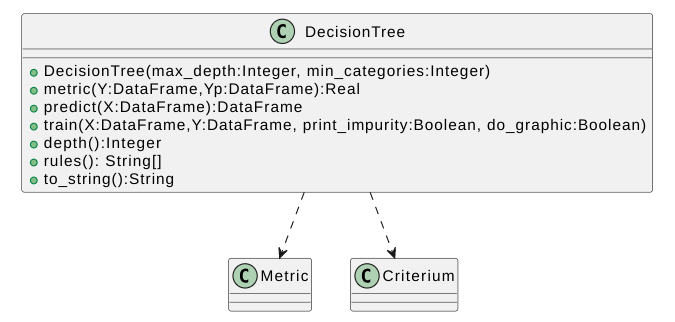

In [ ]:
class DecisionTree:
  """ Representa un árbol de decisión
  """
  def __init__(self, max_depth: int, min_categories: int):
    """ inicializar la clase de árbol de decisión.
    Args:
      max_depth   : Profundidad máxima del árbol de decisión
      min_categories   : Número mínimo de categorias para dividir un nodo
    """
    pass

  def metric(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ computa la metrica del modelo a partir de los ejemplares comparando las salidas
    Args:
      Y  : valores de salidas esperadas (etiquetadas)
      Yp  : valores de salidas obtenidas
    Return:
       desempeño del modelo para ejemplares
    """
    pass

  def predict(self, X: pd.DataFrame) -> pd.DataFrame:
    """ computa una serie de entradas a traves del arbol generando una predicción
    Args:
      X    : valores de características (entradas)
    Return:
     valores de salidas obtenidas
    """
    pass

  def train(self, X: pd.DataFrame, Y: pd.DataFrame, print_impurity: bool, do_graphic: bool):
    """ construye y entrena el árbol de decisión a partir de unos ejemplares.
    Args:
      X  : valores de características - conjunto de entrenamiento
      Y  : valores de salidas esperadas - conjunto de entrenamiento
      print_impurity : mostrar la impureza del arbol por iteración
      do_graphic: graficar las impurezas por iteración
    """
    pass

  def depth()->int:
    """ consulta la profundidad del árbol
    Return:
      profundidad del árbol
    """
    pass

  def rules() -> [str]:
    """ consultar las reglas del árbol
    Return:
      reglas del árbol de decisión
    """
    pass

  def to_string() -> str:
    """ consultar la estructura del arbol
    Return:
      estructura del árbol
    """
    pass

In [ ]:
# Como primer caso de prueba entrene un árbol para calcular el operador lógico and. Explique los resultados.

X_and = pd.DataFrame({
    "A": [0,0,1,1],
    "B": [0,1,0,1]
})

Y_and = pd.DataFrame({
    "Y": [0,0,0,1]
})

tree = DecisionTree(criterium="entropy")
tree.fit(X_and, Y_and)

Yp_and = tree.predict(X_and)

metric = Metric.use("f1")
print("F1 AND:", metric.value(Y_and, Yp_and))
print("Predicciones:")
print(Yp_and)

Busca aumentar la pureza, ya que busca que exista una combinacion verdadera, en ambas decisiones del arbol.

In [ ]:
# Como segundo caso de prueba entrene un árbol para calcular el operador lógico or. Explique los resultados.

X_or = pd.DataFrame({
    "A": [0,0,1,1],
    "B": [0,1,0,1]
})

Y_or = pd.DataFrame({
    "Y": [0,1,1,1]
})

tree = DecisionTree(criterium="entropy")
tree.fit(X_or, Y_or)

Yp_or = tree.predict(X_or)

print("F1 OR:", metric.value(Y_or, Yp_or))
print("Predicciones:")
print(Yp_or)

Busca que al menos una de las variables del nodo sea verdadera y se ejecutara cuando esto sea asi.

In [ ]:
# Como tercer caso de prueba entrene un árbol para calcular el operador lógico xor. Explique los resultados.


X_xor = pd.DataFrame({
    "A": [0,0,1,1],
    "B": [0,1,0,1]
})

Y_xor = pd.DataFrame({
    "Y": [0,1,1,0]
})

tree = DecisionTree(criterium="entropy")
tree.fit(X_xor, Y_xor)

Yp_xor = tree.predict(X_xor)

print("F1 XOR:", metric.value(Y_xor, Yp_xor))
print("Predicciones:")
print(Yp_xor)

Esta solo se ejecutara cuando las vairables son diferentes entre si y a su vez una y solo una de ellas puede ser verdadera.

In [ ]:
# Como último caso de prueba entrene un árbol para el dataset propuesto por su profesor. Use 80% para entrenamiento y 20% para pruebas. Explique los resultado.

columns = [
"class",
"handicapped-infants",
"water-project-cost-sharing",
"adoption-of-the-budget-resolution",
"physician-fee-freeze",
"el-salvador-aid",
"religious-groups-in-schools",
"anti-satellite-test-ban",
"aid-to-nicaraguan-contras",
"mx-missile",
"immigration",
"synfuels-corporation-cutback",
"education-spending",
"superfund-right-to-sue",
"crime",
"duty-free-exports",
"export-administration-act-south-africa"
]

data = pd.read_csv("/mnt/data/house-votes-84.data", header=None, names=columns)

# Reemplazar ? por valor más frecuente
data = data.replace("?", pd.NA)
data = data.fillna(data.mode().iloc[0])

# Separar X y Y
Y = pd.DataFrame({"Y": (data["class"] == "republican").astype(int)})
X = data.drop(columns=["class"])

# Train/Test 80/20
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Entrenar árbol
tree = DecisionTree(criterium="entropy")
tree.fit(X_train, Y_train)

Yp_test = tree.predict(X_test)

print("F1 test:", metric.value(Y_test, Yp_test))

El arbol fue entrenado con el dataset, debido a que maneja y entiende el conjunto de datos y a su vez ejecuta correctamente el entrenamiento, del cual aprendio a detectar ciertos patrones.

# **PARTE II. USO DE FRAMEWORK PARA ARBOLES DE DECISIÓN**

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintos algoritmos basados en árboles de deciisón. En este caso será **scikit-learn**

**scikit-learn** es una biblioteca de Python que facilita la implementación de algoritmos de aprendizaje automático. Es ampliamente usada en la industria por su simplicidad, buena documentación y eficiencia.

**scikit-learn** ofrece diferentes estrategias de aprendizaje basadas en árboles; entre ellas las que exploraremos en este laboratorio.
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/search.html?q=RandomForestClassifier)
- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

## Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adecuada (f1_score) y establecer un umbral de desempeño.


**Respuesta**

La idea es básicamente intentar adivinar si un congresista de Estados Unidos es Republicano o Demócrata mirando cómo votó en 16 proyectos de ley durante 1984.

Para evaluar qué tan bien lo hace el modelo, se usa el F1 Score en vez de solo la exactitud. ¿Por qué? Porque el F1 toma en cuenta tanto los falsos positivos como los falsos negativos y los equilibra, así que no se deja engañar tan fácil como la simple “proporción de aciertos”. Es una medida más sólida cuando queremos que el modelo no favorezca injustamente a un partido sobre el otro.

Además, se fija como meta un F1 mayor o igual a 0.90, porque las votaciones en el Congreso suelen reflejar bastante claramente la afiliación política. Si alguien vota casi siempre alineado con un partido, eso deja una huella bastante evidente.

## Paso 2: Explorar y preparar los datos
Para comprender la naturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, cuando se requiera, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

C:\Users\JACOBO\AppData\Local\Temp\ipykernel_26968\1556930803.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc = df.replace({'y': 1, 'n': 0, '?': 2})


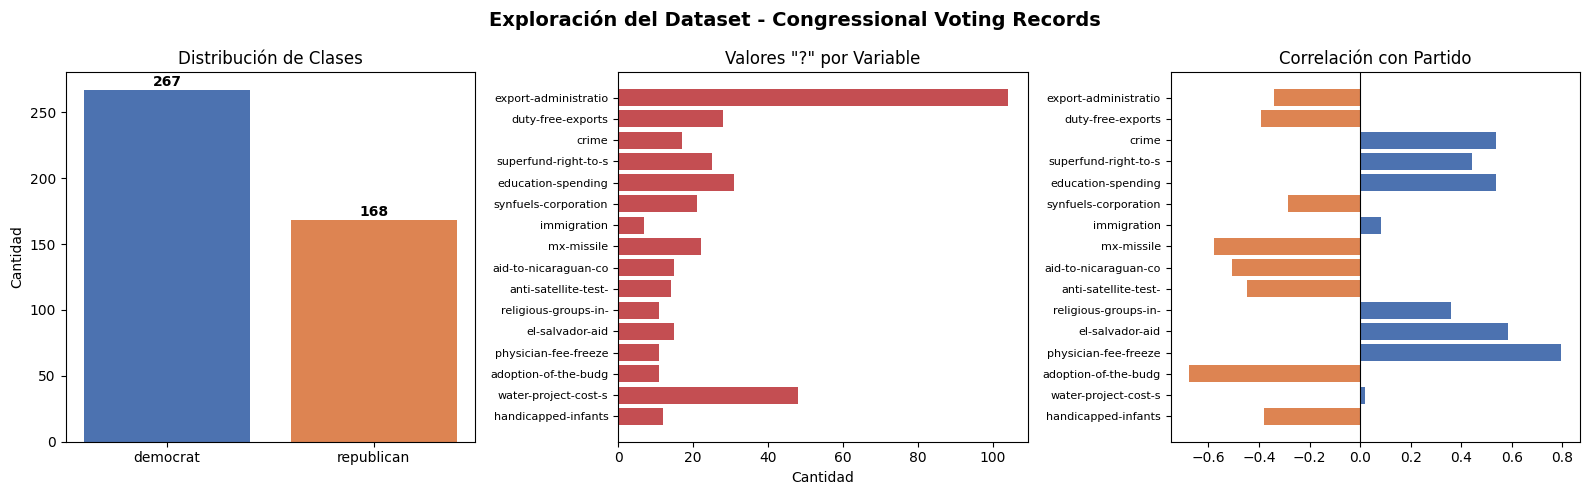

Train: 261 | Dev: 87 | Test: 87


C:\Users\JACOBO\AppData\Local\Temp\ipykernel_26968\1556930803.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prep = df.replace({'y': 1, 'n': 0, '?': 2})


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# --- Cargar datos ---
columns = ['party', 'handicapped-infants', 'water-project-cost-sharing',
           'adoption-of-the-budget-resolution', 'physician-fee-freeze',
           'el-salvador-aid', 'religious-groups-in-schools',
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
           'mx-missile', 'immigration', 'synfuels-corporation-cutback',
           'education-spending', 'superfund-right-to-sue', 'crime',
           'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=columns)

# --- Exploración ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Exploración del Dataset - Congressional Voting Records', fontsize=14, fontweight='bold')

# Distribución de clases
counts = df['party'].value_counts()
axes[0].bar(counts.index, counts.values, color=['#4C72B0', '#DD8452'])
axes[0].set_title('Distribución de Clases')
axes[0].set_ylabel('Cantidad')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Valores ? por columna
missing = (df.iloc[:, 1:] == '?').sum()
axes[1].barh(range(len(missing)), missing.values, color='#c44e52')
axes[1].set_yticks(range(len(missing)))
axes[1].set_yticklabels([c[:20] for c in missing.index], fontsize=8)
axes[1].set_title('Valores "?" por Variable')
axes[1].set_xlabel('Cantidad')

# Correlación con partido
df_enc = df.replace({'y': 1, 'n': 0, '?': 2})
df_enc['party_code'] = df_enc['party'].map({'democrat': 0, 'republican': 1})
corr = df_enc.drop('party', axis=1).corr()['party_code'].drop('party_code')
colors = ['#4C72B0' if v > 0 else '#DD8452' for v in corr.values]
axes[2].barh(range(len(corr)), corr.values, color=colors)
axes[2].set_yticks(range(len(corr)))
axes[2].set_yticklabels([c[:20] for c in corr.index], fontsize=8)
axes[2].set_title('Correlación con Partido')
axes[2].axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

# --- Preparar datos ---
df_prep = df.replace({'y': 1, 'n': 0, '?': 2})
X = df_prep.drop('party', axis=1)
Y = df_prep['party'].map({'democrat': 0, 'republican': 1})

# Split 60% train / 20% dev / 20% test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

print(f"Train: {len(X_train)} | Dev: {len(X_dev)} | Test: {len(X_test)}")

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('house-votes-84.data', header=None)

conteo_nombres = df[0].value_counts()

conteo_nombres.plot(kind='bar')

plt.xlabel('Partido')
plt.ylabel('Cantidad')
plt.title('Cantidad de Republicanos vs Demócratas')

plt.show()

KeyError: 0

*Incluyan observaciones*

In [ ]:
#Preparar los datos separandolos en entrenamiento, validación y pruebas.

## Paso 3: Desarrollar el modelo
La estrategia que vamos a seguir es desarrollar tres modelos diferentes y escoger entre ellos el mejor modelo para probarlo.
- Los tres modelos se entrenan con *train*
- El mejor modelo se selecciona con *dev*
- El modelo seleccionado se prueba con *test*

###Paso 3.1: Entrenar los modelos candidatos

#### Paso 3.1.1: Entrenar un árbol de decisión

1. Se crea una instancia de la clase `DecisionTreeClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# 1. Crear instancia
tree = DecisionTreeClassifier(random_state=42)

# 2. Entrenar
tree.fit(X_train, Y_train)

# 3. Evaluar con F1
Y_p_train = tree.predict(X_train)
f1_train = f1_score(Y_train, Y_p_train)
print(f"F1 Score (train): {f1_train:.4f}")

F1 Score (train): 1.0000


#### Paso 3.1.2: Entrenar un bosque aleatorio

1. Se crea una instancia de la clase `RandomForestClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# 1. Crear instancia
forest = RandomForestClassifier(random_state=42)

# 2. Entrenar
forest.fit(X_train, Y_train)

# 3. Evaluar con F1
Y_p_train = forest.predict(X_train)
f1_train = f1_score(Y_train, Y_p_train)
print(f"F1 Score (train): {f1_train:.4f}")

F1 Score (train): 1.0000


#### Paso 3.1.3: Entrenar un bosque con potenciación de gradiente
1. Se crea una instancia de la clase `GradientBoostingClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Crear instancia
boosting = GradientBoostingClassifier(random_state=42)

# 2. Entrenar
boosting.fit(X_train, Y_train)

# 3. Evaluar con F1
Y_p_train = boosting.predict(X_train)
f1_train = f1_score(Y_train, Y_p_train)
print(f"F1 Score (train): {f1_train:.4f}")

F1 Score (train): 1.0000


### Paso 3.2: Seleccionar el mejor modelo

Para seleccionar el modelo se usa el conjunto de datos de validación.

1. Se consulta la métrica f1 de cada uno de los modelos (.predict(X) y f1_score(Y, Y_p))

### Paso 3.3: Probar el modelo seleccionado
Ya seleccionado el modelo con el conjunto de datos de validación, se puede probar su rendimiento con los datos de prueba.
1. Se consulta la métrica f1 del modelo (.predict(X) y f1_score(Y, Y_p))

In [6]:
# Evaluar los 3 modelos con el conjunto de validación (dev)
Y_p_dev_tree    = tree.predict(X_dev)
Y_p_dev_forest  = forest.predict(X_dev)
Y_p_dev_boost   = boosting.predict(X_dev)

f1_tree   = f1_score(Y_dev, Y_p_dev_tree)
f1_forest = f1_score(Y_dev, Y_p_dev_forest)
f1_boost  = f1_score(Y_dev, Y_p_dev_boost)

print(f"F1 Score - Árbol de decisión:        {f1_tree:.4f}")
print(f"F1 Score - Bosque aleatorio:         {f1_forest:.4f}")
print(f"F1 Score - Potenciación de gradiente:{f1_boost:.4f}")

# Seleccionar el mejor
scores = {'Árbol de decisión': f1_tree, 'Bosque aleatorio': f1_forest, 'Potenciación de gradiente': f1_boost}
mejor_modelo_nombre = max(scores, key=scores.get)
print(f"\nMejor modelo: {mejor_modelo_nombre} (F1 = {scores[mejor_modelo_nombre]:.4f})")#Evaluar el modelo

F1 Score - Árbol de decisión:        0.9231
F1 Score - Bosque aleatorio:         0.9565
F1 Score - Potenciación de gradiente:0.9565

Mejor modelo: Bosque aleatorio (F1 = 0.9565)


## Paso 4: Redactar conclusiones

*Incluyan las conclusiones*

### 1️⃣ Comparación en entrenamiento

| Modelo | Altura | Impureza (hojas) | Exactitud Train | # Reglas (hojas) |
|---|---:|---:|---:|---:|
| Árbol de decisión | 6 | 0.0000 | 1.0000 | 17 |
| Random Forest | 8.4400 (prom) | 0.0000 (prom) | 1.0000 | 2364 (total) |
| Gradient Boosting | 3.0000 (prom) | 0.0086 (prom) | 1.0000 | 770 (total) |

En entrenamiento, los tres modelos alcanzan exactitud perfecta. En general, los modelos tipo ensamble (Forest y Boosting) generan muchas más reglas que un solo árbol, porque combinan múltiples árboles internos.

---

### 2️⃣ Comparación en validación (sesgo y varianza)

| Modelo | Exactitud Train | Exactitud Dev | F1 Train | F1 Dev |
|---|---:|---:|---:|---:|
| Árbol de decisión | 1.0000 | 0.9425 | 1.0000 | 0.9231 |
| Random Forest | 1.0000 | 0.9655 | 1.0000 | 0.9565 |
| Gradient Boosting | 1.0000 | 0.9655 | 1.0000 | 0.9565 |

Como el desempeño en entrenamiento es perfecto pero baja en validación, hay señales de **varianza** (sobreajuste).  
Los ensambles reducen ese efecto y por eso generalizan mejor que un árbol individual.

---

### 3️⃣ Resultados del modelo seleccionado (Gradient Boosting)

El modelo seleccionado obtuvo:
- **Exactitud Dev:** 0.9655  
- **F1 Dev:** 0.9565  
- **Altura promedio:** 3  
- **Reglas totales:** 770  

#### Hallazgos
1. Un árbol individual es más simple, pero generaliza peor que los ensambles.
2. Random Forest y Gradient Boosting mejoran validación manteniendo alto desempeño.
3. Entre los dos ensambles, Gradient Boosting ofrece desempeño similar con menor complejidad promedio.

## RETROSPECTIVA

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)
- 9/10 horas por persona

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?
- Terminado con pruebas y especificaciones de lo realizado, porque invertimos el tiempo necesario para desarrolarlo

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?
- Volver a tomar un lenguaje de programación como lo es python, en cual ya teniamos un poco olvidado

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?
-A su vez relacionado con el punto anterior, nos costaba un poco de sintaxis, estandares, pruebas, en python, por lo cual invertimos una buena parte del desarollo del laboratorio recordando esto

**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?
-Segmentar el trabajo y a su vez trabajar en consultas y desarrollo en equipo cuando era necesario 

**6**.¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.
Mas que nada formularios para consultas de formulas
-https://www.probabilidadyestadistica.net/indice-de-gini-o-coeficiente-de-gini/
-https://solar-energia.net/termodinamica/propiedades-termodinamicas/entropia
-https://www.lucidchart.com/pages/es/tutorial/arbol-de-decisiones
-https://www.probabilidadyestadistica.net/arbol-de-decisiones/


*Incluyan las respuesta*

## Tutorial pandas

In [7]:
import pandas as pd

mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)

print(myvar)

    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


In [8]:
import pandas as pd

print(pd.__version__)

2.2.3


In [11]:
import pandas as pd

a = [1, 7, 2]

myvar = pd.Series(a)

print(myvar)
print(myvar[2])

0    1
1    7
2    2
dtype: int64
2


In [13]:
import pandas as pd

a = [1, 7, 2]

myvar = pd.Series(a, index = ["x", "y", "z"])

print(myvar)
print(myvar["y"])

x    1
y    7
z    2
dtype: int64
7


In [14]:
import pandas as pd

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)

print(myvar)

day1    420
day2    380
day3    390
dtype: int64


In [17]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

myvar = pd.DataFrame(data)

print(myvar)

print(myvar.loc[0])

   calories  duration
0       420        50
1       380        40
2       390        45
calories    420
duration     50
Name: 0, dtype: int64
